In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('train_results_tmp.csv', names=['model_id', 'batch_size', 'episode', 'score'])

In [7]:
model_1 = df[df['model_id']==0][['episode', 'score']]

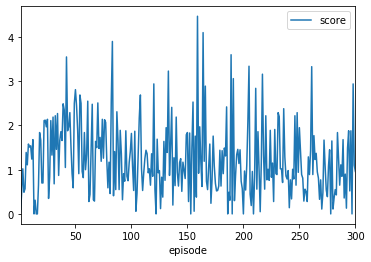

In [8]:
model_1 = model_1.set_index('episode')
model_1.plot()